In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for linking current directory and file name path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/walmart-sales-linear-regression/Walmart_sales.csv


In [3]:
data = pd.read_csv("/kaggle/input/walmart-sales-linear-regression/Walmart_sales.csv")

In [4]:
# Exploring data set
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
data.Temperature = round((data.Temperature-32)/1.8,2)

In [9]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
data = data.drop('Date', axis = 1)

In [11]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,1554806.68,0,8.06,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,18.27,3.997,192.013558,8.684
6431,45,733455.07,0,18.27,3.985,192.170412,8.667
6432,45,734464.36,0,12.48,4.000,192.327265,8.667
6433,45,718125.53,0,13.59,3.969,192.330854,8.667


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'weekly sales distribution')

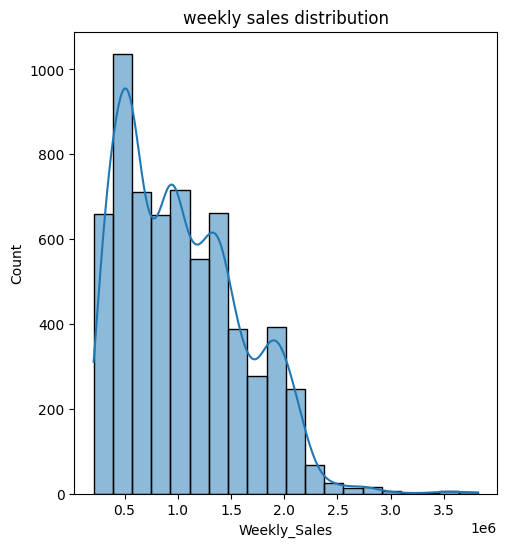

In [12]:
# plotting weekly sales distribution
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Weekly_Sales'], bins = 20, kde = True)
plt.title('weekly sales distribution')

# bins = no. of intervals
# kde = kernel density estimation for prob. density estimation -> smooth curve for undertanding overall pattern of the data
# subplot(1-> row, 2-> col, 1-> plot in 1st axis)
# figsize = 12x6 inches

In [13]:
import warnings
warnings.filterwarnings('ignore')

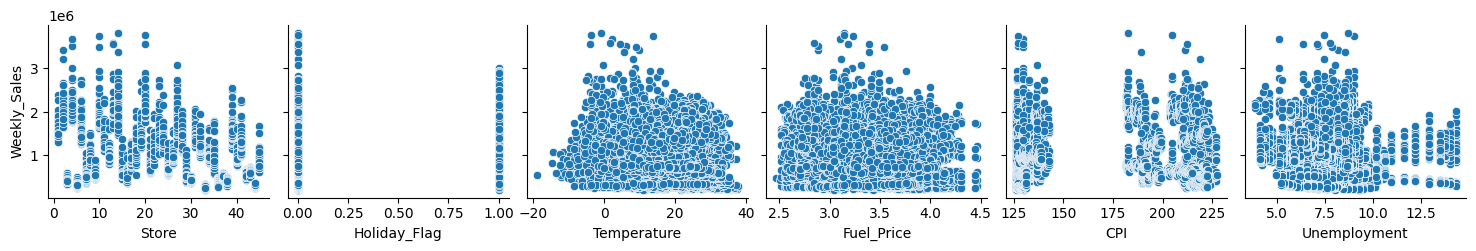

In [14]:
sns.pairplot(data, x_vars=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
            y_vars=['Weekly_Sales'], kind = 'scatter')

# pairplot -> for multi visualization
# parameters -> data, vars, kind

Text(0.5, 1.0, 'Correlation Matrix')

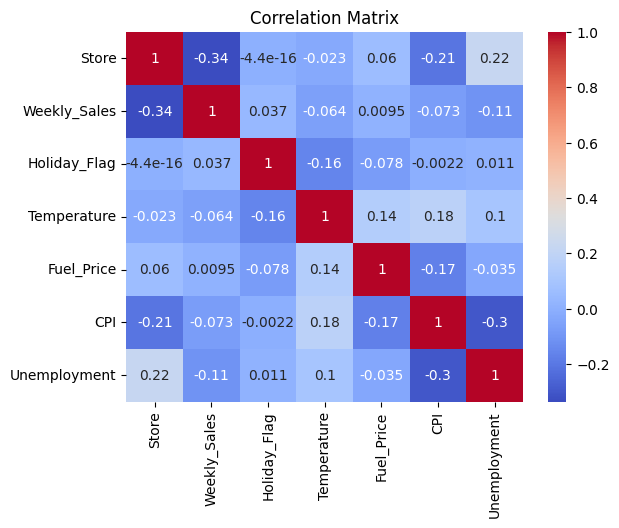

In [15]:
corr_mat = data.corr()
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

# corr_mat -> pair-wise correlations b/w variables
# heatmap -> 
# parameters-> corr_mat, annot(numbers), colormap(cmap) blue = -ve, red = +ve

In [16]:
X = data.drop('Weekly_Sales', axis = 1)
y = data['Weekly_Sales']

In [17]:
# Importing Linear regression models
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
# Traning and testing split of dataset
# X-> Feature matrix, y-> Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# standard scaler = to standardize, normalize all features
# we need to fit(trained data), transform(trained & test data)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# L1 regularization (Lasso Regression) -> removes paramters which doesn't have to do anything with correlated variables -> lambda(|slope|)
# L2 regularization (Ridge Regression) -> shrinks parameters size and reduces variance
# it is used using sum of squarred residuals + Ridge regn penaly=ty = lambda(slope^2), lambda -> k-fold CV
# Elastic regression -> L1 + L2 -> to deal with n no. of parameters( by grouping, shrinking and removing all at once if needed)

In [27]:
from sklearn.linear_model import ElasticNet

In [28]:
elastic_model = ElasticNet()

In [29]:
param_grid = {'alpha':[0.1, 1, 5, 50, 100],
             'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid_model = GridSearchCV(estimator=elastic_model,
                         param_grid = param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=2)

In [32]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [33]:
best_params = grid_model.best_params_

In [34]:
best_params

{'alpha': 0.1, 'l1_ratio': 0.95}

In [35]:
y_pred = grid_model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [37]:
mean_absolute_error(y_test, y_pred)

443317.2975270433

In [38]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [39]:
RMSE

531420.7939814085

In [40]:
np.mean(data['Weekly_Sales'])

1046964.8775617715